#

In [18]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import sys

sys.path.append('../../')
sns.set_style('whitegrid')

from tqdm.notebook import tqdm
from src.data.data_utils import *

In [3]:
s1_data = pd.read_csv('/u/ayang1/foundm/scratch_sc/raw_data/lucas/s1_lucas_2018/S1_point_10days_10m_1Jan-31Dec_Italy_ratio-db.csv')
lucas_2018_filtered = pd.read_csv('/u/ayang1/foundm/scratch_sc/raw_data/lucas/lucas_2018/copernicus_filtered/lucas_2018_filtered.csv')

/tmp/ipykernel_2889057/1527335867.py:2: DtypeWarning: Columns (34,39,44) have mixed types. Specify dtype option on import or set low_memory=False.
  lucas_2018_filtered = pd.read_csv('/u/ayang1/foundm/scratch_sc/raw_data/lucas/lucas_2018/copernicus_filtered/lucas_2018_filtered.csv')


In [4]:
labeled = add_lucas_labels(s1_data, lucas_2018_filtered)
labeled.drop('system:index', axis=1, inplace=True)
labeled = labeled.loc[labeled['LABEL']!='NOT_CROP']

Loading files
Creating dataset of size 111034


100%|██████████| 111034/111034 [00:39<00:00, 2840.76it/s]


In [4]:
# Filter labels with less than 1000 instances
crop_df = pd.read_csv('/u/ayang1/foundm/temp/lucas_italy_labeled.csv')
labels = np.unique(crop_df['LABEL'], return_counts=True)
to_drop = [labels[0][i] for i in range(len(labels[0])) if labels[1][i] < 1000]
crop_df = crop_df.loc[~crop_df['LABEL'].isin(to_drop)]

In [5]:
print('Crops types:', np.unique(crop_df['LABEL']))

Crops types: ['B11' 'B12' 'B13' 'B16' 'B41' 'B52' 'B53' 'B54' 'B55']


In [6]:
vv_cols = [col for col in crop_df.columns if 'VV' == col[0:2]]
vh_cols = [col for col in crop_df.columns if 'VH_' == col[0:3]]

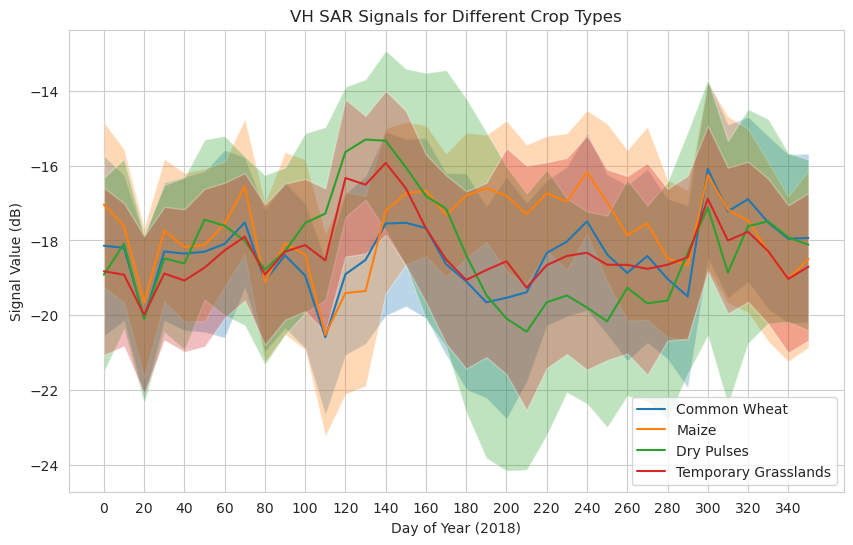

In [23]:
labels = dict(zip(['B11', 'B16', 'B41', 'B55'], ['Common Wheat', 'Maize', 'Dry Pulses', 'Temporary Grasslands']))

plt.figure(figsize=(10, 6))

for crop_type in ['B11', 'B16', 'B41', 'B55']:
    subset = crop_df.loc[crop_df['LABEL']==crop_type][vh_cols]
    mean = subset.mean(axis=0)
    std = subset.std(axis=0)
    plt.plot(mean, label=labels[crop_type])
    plt.fill_between(mean.index, mean - std, mean + std, alpha=0.3)

plt.xlabel('Day of Year (2018)')
plt.ylabel('Signal Value (dB)')
plt.title('VH SAR Signals for Different Crop Types')
plt.xticks(np.arange(0, 36, 2), np.arange(0, 360, 20))
plt.legend(loc='lower right')
plt.show()